#                                            Big Mart Sales Prediction 

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
train = pd.read_csv("C:/Users/Rohit/Downloads/Train_Big_Mart.csv")
test = pd.read_csv("C:/Users/Rohit/Downloads/Test_Big_Mart.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Details of train and test dataset - 

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Null Value Count -

In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

## Feature Engineering Steps

#### Item_Fat_Content
Item_Fat_Content has five unique values ('LF', 'Low Fat', 'low fat', 'reg', 'Regular').
It can be easily noticed that there are actually only two distinct values that are useful.
Changing the values to only two types of values.

In [9]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['LF','Low Fat'],'low fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg','Regular')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['LF','Low Fat'],'low fat')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace('reg','Regular')

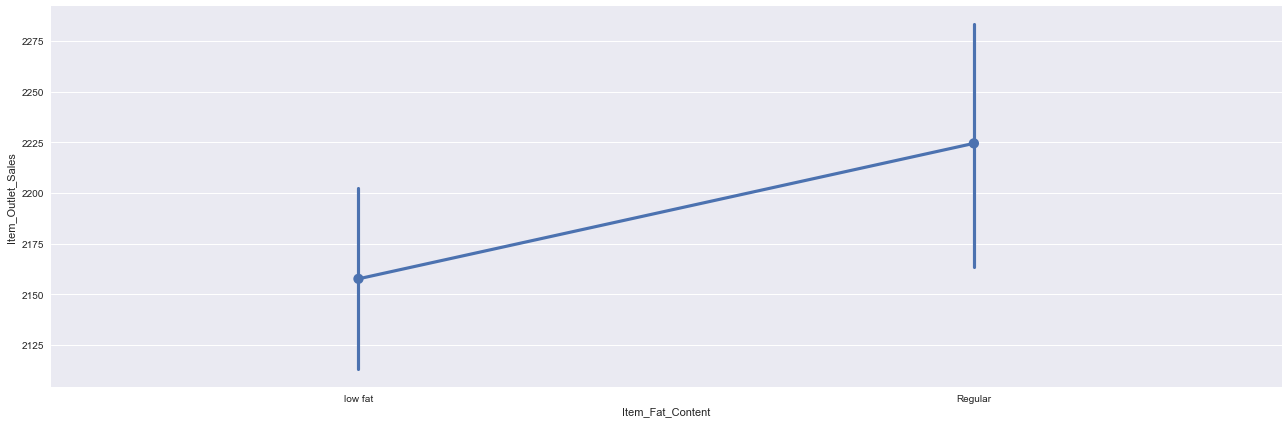

In [11]:
sns.factorplot('Item_Fat_Content','Item_Outlet_Sales', data=train,size=6,aspect=3)

#### Item_Outlet_Age
This data can be used to find out the age of the outlet. I substracted the Outlet_Establishmenyt_Year by 2013 to get the Outlet age. (Given data is of year 2013.) 

In [12]:
train['Outlet_Establishment_Year'].head()

0    1999
1    2009
2    1999
3    1998
4    1987
Name: Outlet_Establishment_Year, dtype: int64

In [13]:
train['Item_Outlet_Age'] = 2013 - train['Outlet_Establishment_Year']
train.drop('Outlet_Establishment_Year', axis=1, inplace=True)
test['Item_Outlet_Age'] = 2013 - test['Outlet_Establishment_Year']
test.drop('Outlet_Establishment_Year', axis=1, inplace=True)

In [14]:
train['Item_Outlet_Age'].head()

0    14
1     4
2    14
3    15
4    26
Name: Item_Outlet_Age, dtype: int64

#### Putting actual values of Item_Weight
Find the value of Item_Weight by matching the Item_Identifier.
(*Ignore the warnings.)

In [15]:
# train['Item_Weight'] = train['Item_Weight'].fillna(0)
# test['Item_Weight'] = test['Item_Weight'].fillna(0)
# s=''
# value=0
# for i in range(train['Item_Type'].count()):
#     if (train['Item_Weight'][i]==0):
#         s = train['Item_Identifier'][i]
#     for i in range(train['Item_Type'].count()):
#         if (train['Item_Weight'][i]>0 and train['Item_Identifier'][i] ==s):
#             value= train['Item_Weight'][i]
#             break
#     train['Item_Weight'][i]=value
# s=''
# value=0
# for i in range(test['Item_Type'].count()):
#     if (test['Item_Weight'][i]==0):
#         s = test['Item_Identifier'][i]
#     for i in range(test['Item_Type'].count()):
#         if (test['Item_Weight'][i]>0 and test  ['Item_Identifier'][i] ==s):
#             value= test['Item_Weight'][i]
#             break
#     train['Item_Weight'][i]=value

#### Putting mean value of Item_Weight
Comment the cell below and uncomment the cell above to to fill 'Item_Weight' values by actual values intead of mean values.

In [16]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

#### Item_Identifier
This column is unique so it cannot be used to train the data as it doesn't add any feature.

In [17]:
train.drop('Item_Identifier',axis=1,inplace = True)
test.drop('Item_Identifier',axis=1,inplace = True)

#### Outlet_Size
Outlet size has 

In [18]:
train['Outlet_Size'] = train['Outlet_Size'].fillna('other')
test['Outlet_Size'] = test['Outlet_Size'].fillna('other')

#### Creating Dummy
Here I created dummy of my dataframe to deal with categorical variables.
And separated the Independent and the dependent variable.

In [19]:
X = pd.get_dummies(train)
test = pd.get_dummies(test)

In [20]:
X_train = X.drop("Item_Outlet_Sales",axis=1)
Y_train = X["Item_Outlet_Sales"]
X_test  = test

#### Train And Test Data Separation
Here I have separated my train data and test data in 80:20 ratio to test the performance of my models.

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2)

#### Visibility of Item_Type - 

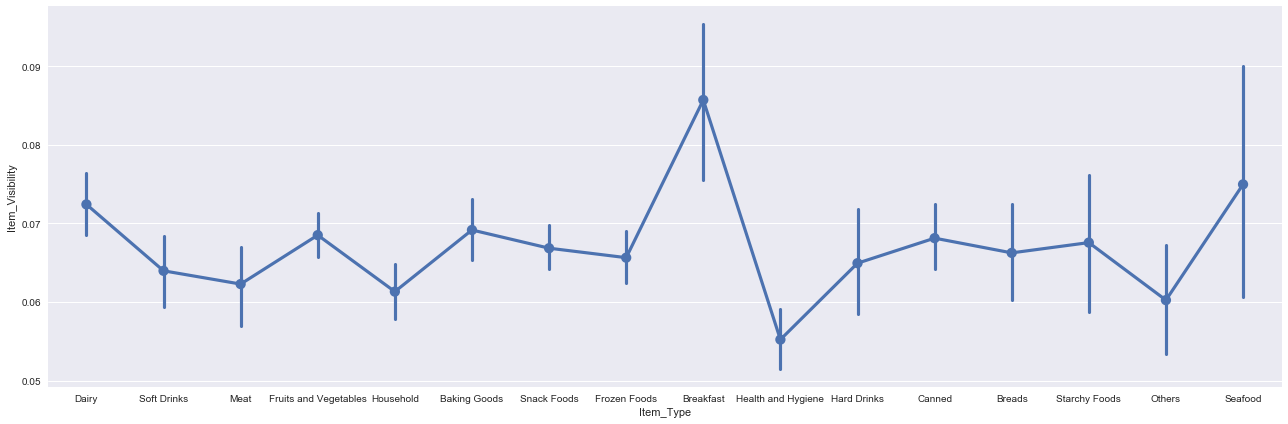

In [22]:
sns.factorplot('Item_Type','Item_Visibility', data=train,size=6,aspect=3)

#### Sales of Outlets - 

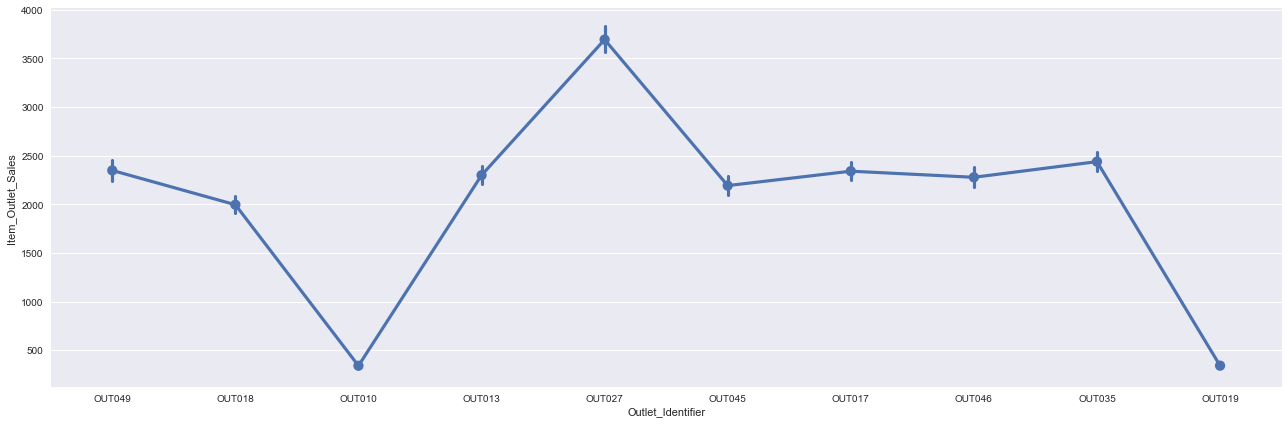

In [23]:
sns.factorplot('Outlet_Identifier','Item_Outlet_Sales', data=train,size=6,aspect=3)

#### Sales of Item_Type  - 

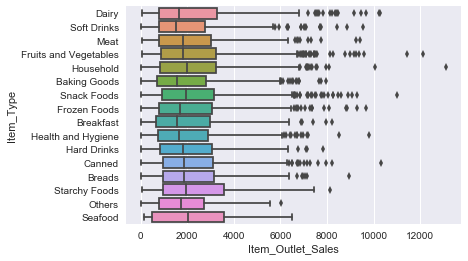

In [24]:
sns.boxplot(train.Item_Outlet_Sales,train.Item_Type)

# Model Performance
## Linear Regression

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)

In [26]:
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test,y_pred)
print ('R Square : ',regr.score(x_test, y_test))
print ('Adjusted R Square : ',1 - (1-regr.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', rmse)

('R Square : ', 0.54163109872825344)
('Adjusted R Square : ', 0.52976483578142308)
('MAE : ', 832.81391709571278)
('MSE : ', 1262618.7600313884)
('RMSE : ', 1123.6630989898122)


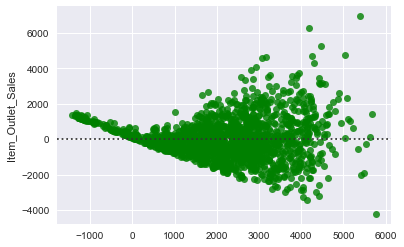

In [27]:
sns.residplot(y_pred, y_test, lowess=False, color="g")

## Decision Tree

In [28]:
from sklearn import tree
model = tree.DecisionTreeRegressor() #for regression
fit_model = model.fit(x_train, y_train)
y_pred1 = model.predict(x_test)

In [29]:
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
mae = mean_absolute_error(y_test,y_pred1)
print ('R Square : ',model.score(x_test, y_test))
print ('Adjusted R Square : ',1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', rmse)

('R Square : ', 0.13412690727509169)
('Adjusted R Square : ', 0.11171116796914882)
('MAE : ', 1085.7354846920821)
('MSE : ', 2385126.0581762665)
('RMSE : ', 1544.3853334502587)


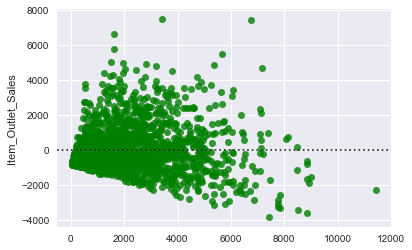

In [30]:
sns.residplot(y_pred1, y_test, lowess=False, color="g")

## KNN(K-Nearest Neighbours)

In [31]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=5) # default value for n_neighbors is 5
model.fit(x_train, y_train)
y_pred2 = model.predict(x_test)

In [32]:
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))
mae = mean_absolute_error(y_test,y_pred2)
print ('R Square : ',model.score(x_test, y_test))
print ('Adjusted R Square : ',1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', rmse)

('R Square : ', 0.47108894359482928)
('Adjusted R Square : ', 0.45739648397687482)
('MAE : ', 859.49867528445736)
('MSE : ', 1456933.5318175778)
('RMSE : ', 1207.035016814996)


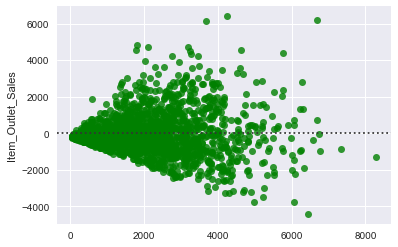

In [33]:
sns.residplot(y_pred2, y_test, lowess=False, color="g")

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(x_train, y_train)
y_pred3= model.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))
mae = mean_absolute_error(y_test,y_pred3)
print ('R Square : ',model.score(x_test, y_test))
print ('Adjusted R Square : ',1 - (1-model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE : ', mae)
print('MSE : ', mse)
print('RMSE : ', rmse)

('R Square : ', 0.51625132364474424)
('Adjusted R Square : ', 0.50372802859159793)
('MAE : ', 801.13199189442821)
('MSE : ', 1332529.6550700939)
('RMSE : ', 1154.3524830267806)


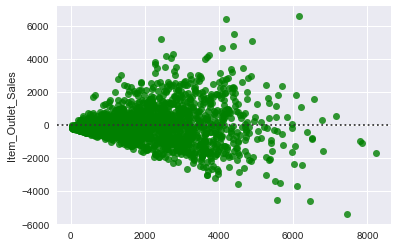

In [36]:
sns.residplot(y_pred3, y_test, lowess=False, color="g")

## KMeans - 
### Elbow Curve
To find the value of k

In [46]:
from sklearn.cluster import KMeans
Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(x_train).score(x_train) for i in range(len(km))]

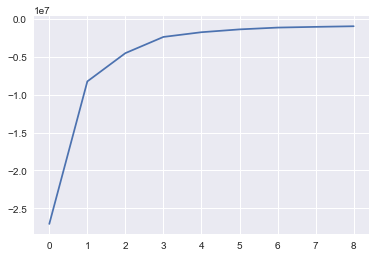

In [47]:
plt.plot(score)
plt.show()
# score

In [62]:
kmeans = KMeans (n_clusters=3)
kmeans_predict = kmeans.fit(x_test)
kmeans_predict = kmeans.predict(x_test)
X = np.array(x_train)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6818 but corresponding boolean dimension is 1705
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6818 but corresponding boolean dimension is 1705
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6818 but corresponding boolean dimension is 1705
  This is separate from the ipykernel package so we can avoid doing imports until


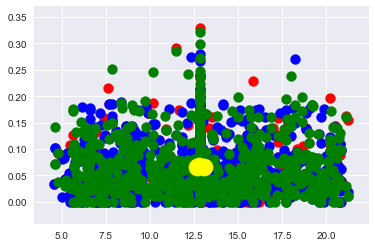

In [63]:
plt.scatter(X[kmeans_predict ==0 , 0], X[kmeans_predict ==0 ,1], s = 100, c= 'red', label = 'Cluster1')
plt.scatter(X[kmeans_predict ==1,0], X[kmeans_predict ==1,1], s = 100, c= 'blue', label = 'Cluster2')
plt.scatter(X[kmeans_predict ==2, 0], X[kmeans_predict ==2,1], s = 100, c= 'green', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1] , s=300, c='yellow', label='Centroids')
plt.show()


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6818 but corresponding boolean dimension is 1705
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6818 but corresponding boolean dimension is 1705
  """
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6818 but corresponding boolean dimension is 1705
  


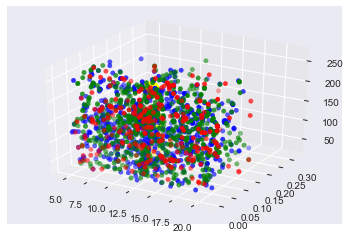

In [64]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[kmeans_predict ==0 , 0], X[kmeans_predict ==0 ,1],X[kmeans_predict ==0 ,2], s=20, c='red', depthshade=True)
ax.scatter(X[kmeans_predict ==1 , 0], X[kmeans_predict ==1 ,1],X[kmeans_predict ==1 ,2], s=20, c='blue', depthshade=True)
ax.scatter(X[kmeans_predict ==2 , 0], X[kmeans_predict ==2 ,1],X[kmeans_predict ==2 ,2], s=20, c='green', depthshade=True)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2] , s=300, c='yellow', label='Centroids')
plt.show()